In [1]:
import sys, os
import xsimlab as xs
import pandas as pd
import numpy as np
import random

random.seed(0)
np.random.seed(164647575)
sys.path.insert(0, os.path.join(os.getcwd(), '..'))

In [2]:
from vmlab.models import basemodel

In [3]:
basemodel

<xsimlab.Model (10 processes, 4 inputs)>
params
    path           [in]
arch
    nb_leaves   [inout] ('GU',) 
    nb_fruits   [inout] ('GU',) 
env
    bloom_date  [inout] ('GU',) bloom date
fruit_growth
light
photo
carbon
inflo_growth
gu_growth
fruit_quality

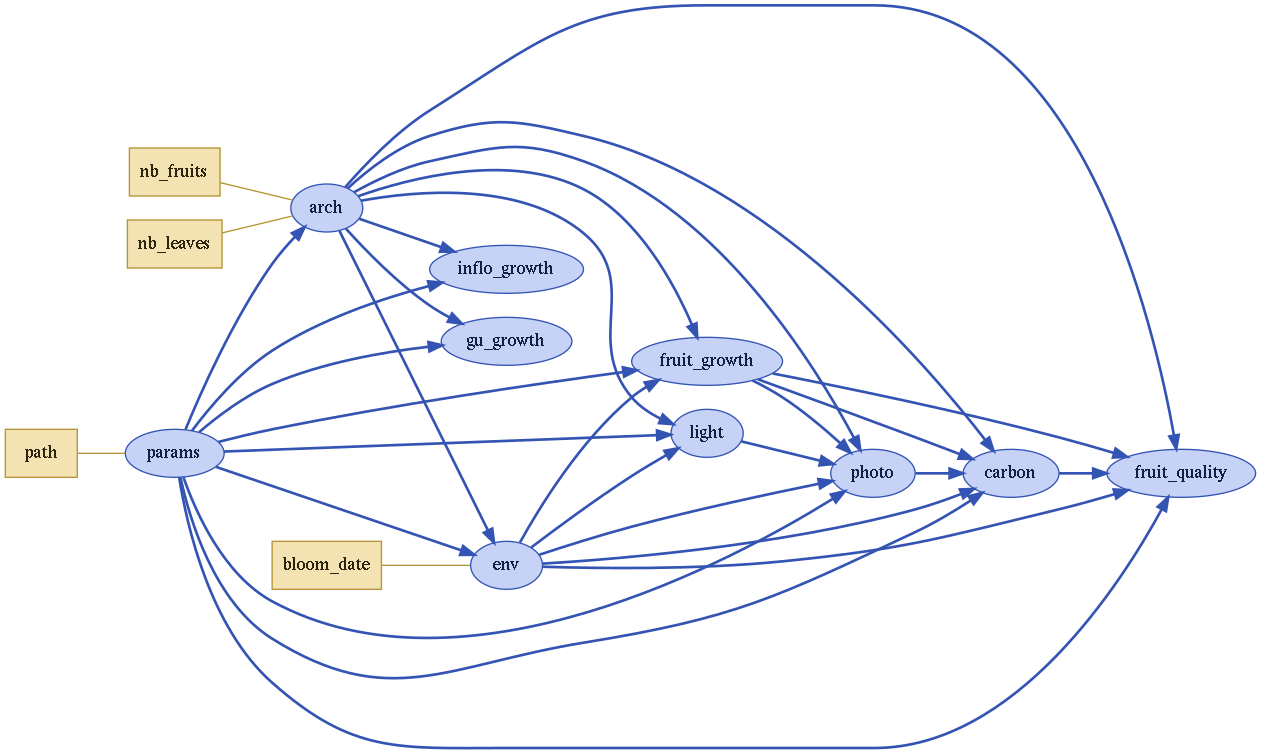

In [4]:
basemodel.visualize(show_inputs=True, show_variables=False)

In [5]:
ds = xs.create_setup(
    model=basemodel,
    clocks={
        'day': pd.date_range(start='2002-09-02', end='2003-03-28', freq="1d")
    },
    master_clock='day',
    input_vars={
        'params': {
            'path': '../share/simulations/default.toml'
        },
        'env': { 
            'bloom_date': [
                '2002-11-01',
                '2002-11-01',
                '2002-11-01',
                '2002-11-01',
                '2002-11-01',
                '2002-11-01'
            ]
        },
        'arch': {
            'nb_leaves': [5, 10, 25, 50, 100, 150],
            'nb_fruits': [1, 1, 1, 1, 1, 1]
        }
    },
    output_vars={
        'env': {
            'GR': 'day',
            'dd_cum': 'day',
            'dd_delta': 'day',
            'LA': 'day',
            'LFratio': 'day',
            'nb_fruits': 'day'
        },
        'photo': {
            'photo': 'day',
            'Pmax': 'day',
            'P_rate_sunlit': 'day',
            'P_rate_shaded': 'day',
            'photo_shaded': 'day',
            'photo_sunlit': 'day',
        },
        'fruit_quality': { 
            'FM_fruit': 'day',
            'W_fleshpeel': 'day',
            'DM_fleshpeel': 'day',
            'W_flesh': 'day',
            'DM_flesh': 'day',
            'flux_xylem_phloem': 'day',
            'transpiration_fruit': 'day',
            'turgor_pressure_fruit': 'day',
            'osmotic_pressure_fruit': 'day',
            'sucrose': 'day',
            'ripe': 'day'
            
        },
        'carbon': { 
            'DM_fruit': 'day',
            'D_fruit': 'day',
            'DM_fruit_delta': 'day',
            'remains_1': 'day',
            'remains_2': 'day',
            'remains_3': 'day',
            'assimilates': 'day',
            'reserve_leaf': 'day',
            'reserve_stem': 'day'
        },
        'light': { 
            'PAR': 'day',
            'PAR_shaded': 'day'
        },
        'arch': { 
            'nb_leaves': 'day'
        }
    }
)

In [6]:
ds

<xarray.Dataset>
Dimensions:          (GU: 6, day: 208)
Coordinates:
  * day              (day) datetime64[ns] 2002-09-02 2002-09-03 ... 2003-03-28
Dimensions without coordinates: GU
Data variables:
    params__path     <U33 '../share/simulations/default.toml'
    env__bloom_date  (GU) <U10 '2002-11-01' '2002-11-01' ... '2002-11-01'
    arch__nb_leaves  (GU) int64 5 10 25 50 100 150
    arch__nb_fruits  (GU) int64 1 1 1 1 1 1

In [7]:
ds2 = ds.xsimlab.run(model=basemodel)

In [8]:
ds2

<xarray.Dataset>
Dimensions:                                (GU: 6, day: 208, hour: 24)
Coordinates:
  * GU                                     (GU) float64 0.0 1.0 2.0 3.0 4.0 5.0
  * day                                    (day) datetime64[ns] 2002-09-02 .....
  * hour                                   (hour) int8 0 1 2 3 4 ... 20 21 22 23
Data variables:
    arch__nb_fruits                        (GU) int64 1 1 1 1 1 1
    arch__nb_leaves                        (day, GU) int64 5 10 25 ... 100 150
    carbon__DM_fruit                       (day, GU) float64 0.0 0.0 ... 94.77
    carbon__DM_fruit_delta                 (day, GU) float64 0.0 ... 0.0003771
    carbon__D_fruit                        (day, GU) float64 0.0 ... 0.0001749
    carbon__assimilates                    (day, GU) float64 0.04289 ... 3.172
    carbon__remains_1                      (day, GU) float64 0.04289 ... 2.76
    carbon__remains_2                      (day, GU) float64 0.04289 ... 2.612
    carbon__remains_3                      (day, GU) float64 0.04289 ... 2.612
    carbon__reserve_leaf                   (day, GU) float64 0.0 0.0 ... 2.569
    carbon__reserve_stem                   (day, GU) float64 2.616 ... 2.616
    env__GR                                (day, hour) int64 0 0 0 0 ... 0 0 0 0
    env__LA                                (day, GU) float64 0.0 0.0 ... 0.5579
    env__LFratio                           (day, GU) float64 0.0 0.0 ... 150.0
    env__bloom_date                        (GU) <U10 '2002-11-01' ... '2002-1...
    env__dd_cum                            (day, GU) float64 0.0 ... 1.421e+03
    env__dd_delta                          (day, GU) float64 0.0 0.0 ... 8.85
    env__nb_fruits                         (day, GU) float64 0.0 0.0 ... 1.0 1.0
    fruit_quality__DM_flesh                (day, GU) float64 0.0 0.0 ... 63.96
    fruit_quality__DM_fleshpeel            (day, GU) float64 0.0 0.0 ... 77.75
    fruit_quality__FM_fruit                (day, GU) float64 0.0 0.0 ... 466.2
    fruit_quality__W_flesh                 (day, GU) float64 0.0 0.0 ... 304.3
    fruit_quality__W_fleshpeel             (day, GU) float64 0.0 0.0 ... 339.7
    fruit_quality__flux_xylem_phloem       (day, GU) float64 -0.0 -0.0 ... 9.56
    fruit_quality__osmotic_pressure_fruit  (day, GU) float64 0.0 0.0 ... 1.918
    fruit_quality__ripe                    (day, GU) float64 0.0 0.0 ... 1.0 1.0
    fruit_quality__sucrose                 (day, GU) float64 0.0 0.0 ... 0.1057
    fruit_quality__transpiration_fruit     (day, GU) float64 0.0 0.0 ... 9.56
    fruit_quality__turgor_pressure_fruit   (day, GU) float64 0.0 0.0 ... 1.608
    light__PAR                             (day, hour) float64 0.0 0.0 ... 0.0
    light__PAR_shaded                      (day, hour) float64 0.0 0.0 ... 0.0
    params__path                           <U33 '../share/simulations/default...
    photo__P_rate_shaded                   (day, GU, hour) float64 0.0 ... 0.0
    photo__P_rate_sunlit                   (day, GU, hour) float64 0.0 ... 0.0
    photo__Pmax                            (day, GU) int64 0 0 0 0 ... 15 15 15
    photo__photo                           (day, GU) float64 0.0 0.0 ... 3.09
    photo__photo_shaded                    (day, GU) float64 0.0 0.0 ... 0.05871
    photo__photo_sunlit                    (day, GU) float64 0.0 0.0 ... 3.031

In [9]:
GU = 0

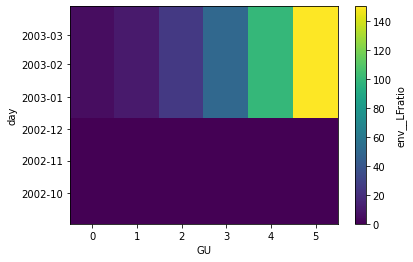

In [10]:
ds2[('env__LFratio')].loc[:, :].plot()

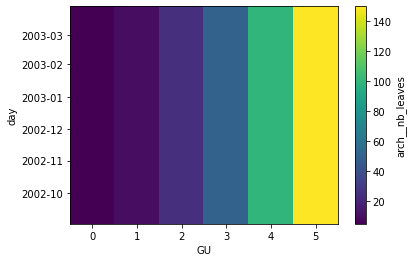

In [11]:
ds2[('arch__nb_leaves')].loc[:, :].plot()

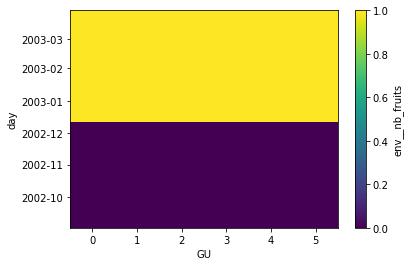

In [12]:
ds2[('env__nb_fruits')].loc[:, :].plot()

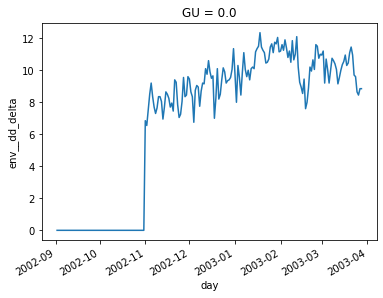

In [13]:
ds2[('env__dd_delta')].loc[:, GU].plot()

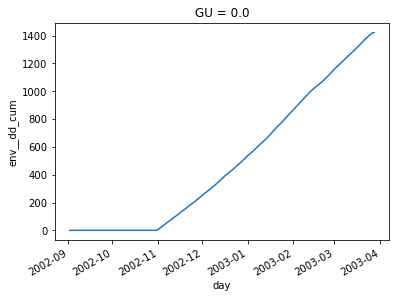

In [14]:
ds2[('env__dd_cum')].loc[:, GU].plot()

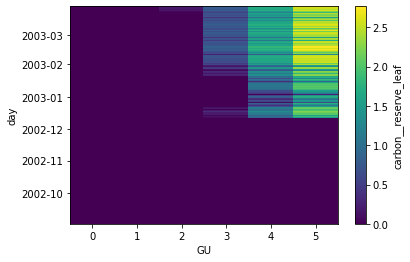

In [15]:
ds2[('carbon__reserve_leaf')].loc[:,:].plot()

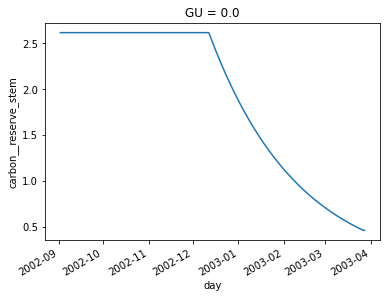

In [16]:
ds2[('carbon__reserve_stem')].loc[:, GU].plot()

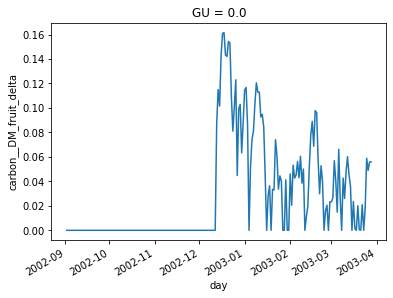

In [17]:
ds2['carbon__DM_fruit_delta'].loc[:, GU].plot()

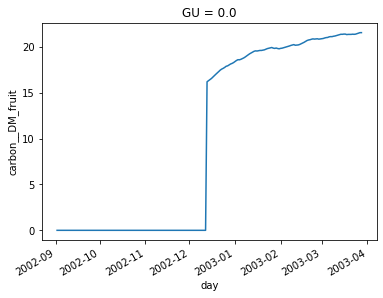

In [18]:
ds2['carbon__DM_fruit'][:,GU].plot()

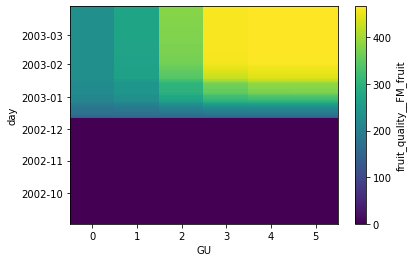

In [36]:
ds2['fruit_quality__FM_fruit'].loc[:,:].plot()

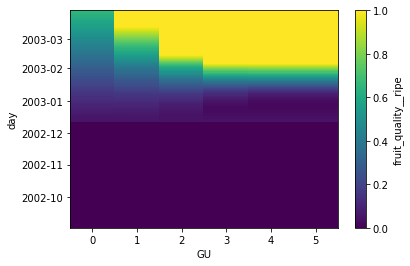

In [20]:
ds2['fruit_quality__ripe'].loc[:,:].plot()

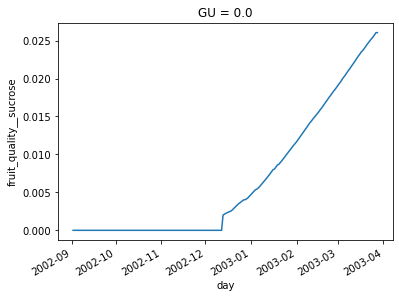

In [21]:
ds2['fruit_quality__sucrose'].loc[:,GU].plot()

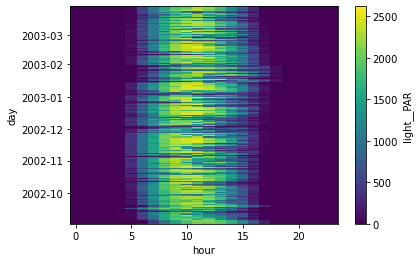

In [22]:
ds2['light__PAR'].loc[:].plot()

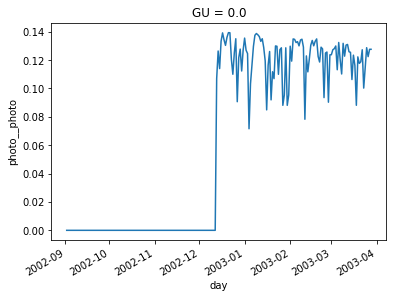

In [23]:
ds2['photo__photo'].loc[:,GU].plot()

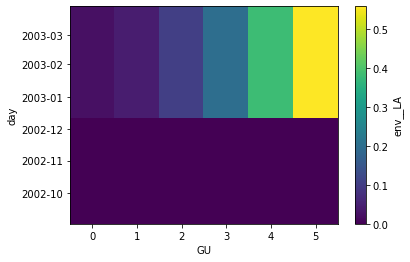

In [24]:
ds2['env__LA'].loc[:,:].plot()

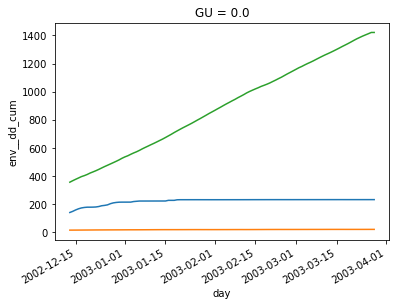

In [25]:
ds2['fruit_quality__FM_fruit'].loc['2002-12-13':,0].plot()
ds2['carbon__DM_fruit'].loc['2002-12-13':,0].plot()
ds2['env__dd_cum'].loc['2002-12-13':,0].plot()

In [26]:
ds2['fruit_quality__FM_fruit'].loc['2002-12-13':,0]

<xarray.DataArray 'fruit_quality__FM_fruit' (day: 106)>
array([141.58870335, 149.68890232, 159.58660593, 167.85759979,
       173.89375955, 177.3294213 , 179.26384024, 179.31214018,
       179.68772839, 180.78875949, 184.02772395, 189.48733519,
       192.05081779, 195.77550906, 204.14515024, 209.86135076,
       212.96871033, 214.82456992, 215.183311  , 215.22225556,
       215.26195774, 215.29125447, 219.30999699, 221.20748444,
       222.95226595, 222.97979683, 223.01492114, 223.05589043,
       223.09424199, 223.13263413, 223.16412571, 223.19635868,
       223.22510341, 223.24020368, 227.89084503, 227.90048942,
       227.91285443, 231.74422389, 232.3873048 , 232.39849693,
       232.42368368, 232.44439685, 232.45583395, 232.47095398,
       232.48469788, 232.42527215, 232.39602531, 232.41005059,
       232.36328774, 232.33388098, 232.34954883, 232.35652837,
       232.37463952, 232.38915159, 232.40449068, 232.42360902,
       232.438223  , 232.45879759, 232.47190255, 232.48894219,
       232.55345897, 232.5572861 , 232.63760479, 232.68908305,
       232.7155657 , 232.74583473, 232.76919243, 232.80246315,
       232.83518236, 232.8546331 , 232.86480415, 232.88276529,
       232.89621553, 232.87421223, 232.87959167, 232.88657581,
       232.84870177, 232.85679894, 232.86473536, 232.87369419,
       232.89304586, 232.90678351, 232.91183557, 232.93434957,
       232.94360931, 232.94042662, 232.95495263, 232.96382883,
       232.98006227, 233.00054491, 233.01596616, 233.02832446,
       233.0238136 , 233.03183128, 233.03227257, 232.98384825,
       232.99067947, 232.99082869, 232.990868  , 232.99796292,
       232.98599612, 232.99213605, 233.01217746, 233.02881969,
       233.04783668, 233.04783668])
Coordinates:
    GU       float64 0.0
  * day      (day) datetime64[ns] 2002-12-13 2002-12-14 ... 2003-03-28
Attributes:
    description:  flesh and peel water mass of the previous day
    unit:         g FM
    _FillValue:   nan

In [27]:
ds2['carbon__DM_fruit'].loc['2002-12-13':,0]

<xarray.DataArray 'carbon__DM_fruit' (day: 106)>
array([16.18411696, 16.2991981 , 16.40074801, 16.54375556, 16.70470041,
       16.86625126, 17.00949877, 17.15157851, 17.30590692, 17.45900782,
       17.56856703, 17.64962843, 17.75037568, 17.87341003, 17.91819838,
       18.01744051, 18.12032229, 18.18365473, 18.27144752, 18.38599982,
       18.50278007, 18.58895352, 18.57936184, 18.63085846, 18.70505791,
       18.78603513, 18.88934601, 19.0098477 , 19.12264928, 19.23556872,
       19.32819157, 19.4229934 , 19.50753524, 19.55194718, 19.53458347,
       19.56294816, 19.59931436, 19.59754087, 19.63104532, 19.66396183,
       19.73803614, 19.79895396, 19.83259067, 19.87705805, 19.91747824,
       19.85194045, 19.81968526, 19.86093294, 19.80936013, 19.7769284 ,
       19.82300702, 19.84353392, 19.89679779, 19.93947715, 19.98458828,
       20.04081347, 20.08379181, 20.14429882, 20.18283893, 20.23294954,
       20.16585645, 20.17711138, 20.19672673, 20.24846339, 20.32634332,
       20.41535767, 20.4840473 , 20.58188629, 20.67810307, 20.73530174,
       20.76521124, 20.81802732, 20.85757894, 20.83265072, 20.84846925,
       20.86900646, 20.82682387, 20.85018406, 20.87343369, 20.89971877,
       20.95662253, 20.99701855, 21.01187436, 21.07807566, 21.10530423,
       21.10178961, 21.14450214, 21.17060214, 21.21833483, 21.27856157,
       21.32389238, 21.36022288, 21.35524772, 21.37882045, 21.38011747,
       21.32672302, 21.34680798, 21.34724645, 21.34736186, 21.36822315,
       21.35502827, 21.37308157, 21.43200907, 21.48094227, 21.53685715,
       21.53685715])
Coordinates:
    GU       float64 0.0
  * day      (day) datetime64[ns] 2002-12-13 2002-12-14 ... 2003-03-28
Attributes:
    description:  fruit dry mass
    unit:         g DM
    _FillValue:   nan

In [28]:
ds2['fruit_quality__W_fleshpeel'].loc['2002-12-13':,0]

<xarray.DataArray 'fruit_quality__W_fleshpeel' (day: 106)>
array([113.42537428, 120.58564522, 129.36655839, 136.65710515,
       141.93180626, 144.87728057, 146.49325674, 146.42116913,
       146.63222269, 147.49390306, 150.30544058, 155.12869207,
       157.34249115, 160.57805383, 168.0366711 , 173.07493589,
       175.77403977, 177.38453834, 177.63451521, 177.57639035,
       177.51713445, 177.47340854, 181.07996244, 182.73734561,
       184.2395492 , 184.19845922, 184.14603604, 184.08488899,
       184.02764859, 183.97034771, 183.92334585, 183.87523774,
       183.83233575, 183.80979815, 187.98852578, 187.97413161,
       187.95567686, 191.38809162, 191.93676367, 191.92005941,
       191.88246829, 191.85155358, 191.83448348, 191.81191685,
       191.79140401, 191.79140401, 191.79140401, 191.77047139,
       191.77047139, 191.77047139, 191.74708723, 191.73667014,
       191.70963934, 191.68797994, 191.66508631, 191.63655214,
       191.61474061, 191.58403302, 191.56447363, 191.53904195,
       191.65129709, 191.64558513, 191.70158225, 191.70566969,
       191.66614428, 191.6209674 , 191.58610547, 191.5364487 ,
       191.48761459, 191.45858359, 191.44340305, 191.41659609,
       191.39652142, 191.39706156, 191.38903279, 191.37860898,
       191.37894896, 191.3672294 , 191.35545563, 191.34213228,
       191.31325   , 191.29274632, 191.28520598, 191.25160397,
       191.23778342, 191.23778768, 191.21610772, 191.20285987,
       191.1786315 , 191.14806105, 191.12505558, 191.10661657,
       191.1066178 , 191.09465286, 191.09399469, 191.09399537,
       191.08380066, 191.08357821, 191.08351968, 191.07293055,
       191.07293064, 191.06376683, 191.03385513, 191.00901635,
       190.98063336, 190.98063336])
Coordinates:
    GU       float64 0.0
  * day      (day) datetime64[ns] 2002-12-13 2002-12-14 ... 2003-03-28
Attributes:
    description:  fruit flesh and peel water mass
    unit:         g H2O
    _FillValue:   nan

In [29]:
ds2['fruit_quality__DM_fleshpeel'].loc['2002-12-13':,0]

<xarray.DataArray 'fruit_quality__DM_fleshpeel' (day: 106)>
array([13.36669463, 13.46011668, 13.54255412, 13.65864643, 13.78930017,
       13.92044604, 14.03673363, 14.15207362, 14.27735767, 14.40164587,
       14.49058696, 14.55639362, 14.63818207, 14.73806425, 14.77442431,
       14.85499226, 14.93851537, 14.98993101, 15.06120522, 15.15420476,
       15.24901379, 15.31897479, 15.31118737, 15.35299597, 15.41323664,
       15.47898041, 15.56285725, 15.66069213, 15.75227617, 15.84395705,
       15.91915949, 15.99613208, 16.06477485, 16.10083468, 16.08673618,
       16.10976685, 16.13929442, 16.13785437, 16.16505848, 16.19178526,
       16.25193099, 16.30139426, 16.32870624, 16.36481278, 16.39763322,
       16.34441774, 16.31822732, 16.35171952, 16.3098436 , 16.28350997,
       16.32092461, 16.33759185, 16.38084112, 16.41549601, 16.45212572,
       16.49778028, 16.53267857, 16.58181062, 16.61310545, 16.65379605,
       16.59931541, 16.60845454, 16.62438246, 16.66639358, 16.72963409,
       16.80191675, 16.8576954 , 16.93714595, 17.01527997, 17.06172903,
       17.0860177 , 17.12890879, 17.16102808, 17.14078408, 17.15363012,
       17.1703082 , 17.13605217, 17.15502272, 17.17390352, 17.19524946,
       17.24146107, 17.27426676, 17.2863312 , 17.3400944 , 17.362207  ,
       17.35935266, 17.3940406 , 17.41523705, 17.4540024 , 17.50291496,
       17.53973009, 17.5692359 , 17.56519522, 17.58433995, 17.5853933 ,
       17.54202885, 17.55834089, 17.55869697, 17.5587907 , 17.57573329,
       17.56501699, 17.57967908, 17.62753778, 17.6672796 , 17.71269222,
       17.71269222])
Coordinates:
    GU       float64 0.0
  * day      (day) datetime64[ns] 2002-12-13 2002-12-14 ... 2003-03-28
Attributes:
    description:  fruit flesh and peel dry mass
    unit:         g DM
    _FillValue:   nan

In [30]:
ds2['fruit_quality__W_flesh'].loc['2002-12-13':,0]

<xarray.DataArray 'fruit_quality__W_flesh' (day: 106)>
array([101.60645028, 108.02062099, 115.886563  , 122.41743479,
       127.14251205, 129.78106793, 131.22865939, 131.16408331,
       131.35314508, 132.12503836, 134.64361367, 138.96428236,
       140.94740357, 143.84582062, 150.52724997, 155.04052757,
       157.45838483, 158.90106945, 159.12499873, 159.07293048,
       159.01984904, 158.98067937, 162.21143036, 163.6961142 ,
       165.04178817, 165.00497977, 164.95801909, 164.90324355,
       164.85196761, 164.80063748, 164.75853321, 164.71543797,
       164.67700637, 164.65681718, 168.4001214 , 168.3872271 ,
       168.37069533, 171.44545247, 171.9369529 , 171.92198922,
       171.88831509, 171.86062169, 171.8453303 , 171.82511511,
       171.80673972, 171.80673972, 171.80673972, 171.78798827,
       171.78798827, 171.78798827, 171.76704074, 171.75770911,
       171.73349492, 171.71409243, 171.69358432, 171.66802341,
       171.64848464, 171.62097678, 171.60345547, 171.58067378,
       171.68123193, 171.67611516, 171.72627738, 171.72993891,
       171.69453205, 171.6540626 , 171.62283328, 171.57835075,
       171.53460515, 171.50859918, 171.49500045, 171.47098677,
       171.45300389, 171.45348775, 171.44629557, 171.43695792,
       171.43726248, 171.4267641 , 171.41621715, 171.4042821 ,
       171.37840935, 171.36004215, 171.35328752, 171.32318684,
       171.31080639, 171.31081021, 171.2913893 , 171.27952187,
       171.2578181 , 171.23043309, 171.20982479, 171.19330713,
       171.19330822, 171.18259004, 171.18200045, 171.18200105,
       171.17286863, 171.17266936, 171.17261693, 171.16313119,
       171.16313126, 171.15492233, 171.12812743, 171.10587684,
       171.08045137, 171.08045137])
Coordinates:
    GU       float64 0.0
  * day      (day) datetime64[ns] 2002-12-13 2002-12-14 ... 2003-03-28
Attributes:
    description:  fruit flesh water mass
    unit:         g H2O
    _FillValue:   nan

In [31]:
ds2['fruit_quality__DM_flesh'].loc['2002-12-13':,0]

<xarray.DataArray 'fruit_quality__DM_flesh' (day: 106)>
array([10.995443  , 11.07229198, 11.14010502, 11.23560256, 11.34307832,
       11.45095891, 11.54661708, 11.64149576, 11.74455442, 11.84679389,
       11.91995683, 11.97408939, 12.04136857, 12.12353166, 12.15344144,
       12.21971663, 12.28842274, 12.33071725, 12.38934741, 12.46584884,
       12.54383874, 12.60138866, 12.59498273, 12.62937448, 12.67892846,
       12.73300928, 12.80200637, 12.88248534, 12.95782238, 13.03323907,
       13.0951006 , 13.15841825, 13.21488379, 13.24454661, 13.23294918,
       13.25189421, 13.27618359, 13.274999  , 13.29737711, 13.31936255,
       13.36883843, 13.40952692, 13.43199375, 13.46169499, 13.48869308,
       13.44491803, 13.42337379, 13.45092448, 13.41647734, 13.3948153 ,
       13.42559259, 13.43930306, 13.4748799 , 13.50338702, 13.53351862,
       13.57107406, 13.59978139, 13.64019742, 13.66594054, 13.69941263,
       13.65459685, 13.66211471, 13.67521701, 13.70977536, 13.761797  ,
       13.82125672, 13.86714024, 13.93249626, 13.99676931, 14.0349783 ,
       14.05495816, 14.09024037, 14.1166617 , 14.10000898, 14.11057614,
       14.12429552, 14.09611652, 14.11172169, 14.12725304, 14.14481221,
       14.18282588, 14.20981184, 14.21973605, 14.26396165, 14.28215148,
       14.2798035 , 14.3083378 , 14.325774  , 14.35766237, 14.39789785,
       14.42818197, 14.45245345, 14.44912959, 14.46487804, 14.46574453,
       14.43007294, 14.44349122, 14.44378413, 14.44386123, 14.45779821,
       14.44898298, 14.46104401, 14.50041258, 14.5331042 , 14.57046062,
       14.57046062])
Coordinates:
    GU       float64 0.0
  * day      (day) datetime64[ns] 2002-12-13 2002-12-14 ... 2003-03-28
Attributes:
    description:  fruit flesh dry mass
    unit:         g DM
    _FillValue:   nan

In [32]:
ds2['fruit_quality__turgor_pressure_fruit'].loc['2002-12-13':,0]

<xarray.DataArray 'fruit_quality__turgor_pressure_fruit' (day: 106)>
array([0.4331711 , 0.39002699, 0.42686452, 0.4084199 , 0.38341672,
       0.35373801, 0.3378608 , 0.31379565, 0.3192261 , 0.32989749,
       0.36146858, 0.39675656, 0.36619962, 0.38532525, 0.45059415,
       0.42866431, 0.40608502, 0.3966535 , 0.38235818, 0.33620894,
       0.35943958, 0.32434581, 0.42571074, 0.40777595, 0.40919755,
       0.33729253, 0.31459406, 0.3399881 , 0.31216427, 0.2441649 ,
       0.17536033, 0.24238455, 0.28397205, 0.32958743, 0.44502742,
       0.3951135 , 0.36025811, 0.44329497, 0.41517013, 0.32446448,
       0.34434537, 0.26010733, 0.38579347, 0.36308472, 0.30457455,
       0.33070306, 0.36698165, 0.30017287, 0.34099687, 0.36859748,
       0.33508186, 0.36273599, 0.28105384, 0.26523252, 0.29460321,
       0.28624623, 0.27199401, 0.26149597, 0.22752149, 0.35182022,
       0.51476154, 0.39638585, 0.54346546, 0.49448816, 0.39998679,
       0.37392771, 0.30724939, 0.32732844, 0.35021269, 0.39091406,
       0.38387203, 0.3694078 , 0.33870331, 0.44645884, 0.36528302,
       0.37555195, 0.48430692, 0.45366654, 0.42218639, 0.42200467,
       0.36086162, 0.35677517, 0.33498739, 0.39690271, 0.38254922,
       0.43300714, 0.31767448, 0.37500303, 0.40080985, 0.39455298,
       0.53640171, 0.50533383, 0.48571148, 0.45646816, 0.43509621,
       0.53471163, 0.4948991 , 0.45418576, 0.43769086, 0.36046692,
       0.50758427, 0.39812662, 0.37550656, 0.39312129, 0.39638128,
       0.39638128])
Coordinates:
    GU       float64 0.0
  * day      (day) datetime64[ns] 2002-12-13 2002-12-14 ... 2003-03-28
Attributes:
    description:  turgor pressure in the fruit
    unit:         MPa
    _FillValue:   nan

In [33]:
ds2['fruit_quality__osmotic_pressure_fruit'].loc['2002-12-13':,0]

<xarray.DataArray 'fruit_quality__osmotic_pressure_fruit' (day: 106)>
array([0.84472378, 0.79516546, 0.76189006, 0.72669515, 0.70179223,
       0.68591236, 0.68121219, 0.68099891, 0.68414869, 0.68747983,
       0.6888146 , 0.68295882, 0.67143053, 0.66726487, 0.65907323,
       0.6410243 , 0.63129405, 0.62755409, 0.6259359 , 0.62675762,
       0.62735436, 0.63255702, 0.63284347, 0.6249764 , 0.62308195,
       0.62321076, 0.62472864, 0.62598494, 0.62905015, 0.63165449,
       0.63546636, 0.63799988, 0.63999865, 0.64375764, 0.64381766,
       0.63633757, 0.63834428, 0.63694804, 0.62973662, 0.62863303,
       0.63048289, 0.63349146, 0.63378227, 0.63717422, 0.63936077,
       0.64086093, 0.6388341 , 0.63949614, 0.64016105, 0.63940798,
       0.6400472 , 0.64214455, 0.64257499, 0.64522779, 0.64593434,
       0.6465197 , 0.64886227, 0.64924302, 0.65315857, 0.65270139,
       0.65344434, 0.65540414, 0.65325682, 0.65252988, 0.65357752,
       0.65511489, 0.65894668, 0.65800925, 0.6612198 , 0.66523654,
       0.66908192, 0.66987458, 0.67272922, 0.6726614 , 0.67570098,
       0.67649929, 0.6754064 , 0.67636202, 0.67738981, 0.67890962,
       0.6768082 , 0.68110643, 0.68154289, 0.68100445, 0.68439726,
       0.68675223, 0.68706805, 0.6883239 , 0.68891775, 0.68908779,
       0.69171845, 0.69410605, 0.6960222 , 0.69692885, 0.69877364,
       0.69703636, 0.69785307, 0.70003952, 0.70125921, 0.70102585,
       0.70019296, 0.70106646, 0.70085679, 0.70290311, 0.70576774,
       0.70576774])
Coordinates:
    GU       float64 0.0
  * day      (day) datetime64[ns] 2002-12-13 2002-12-14 ... 2003-03-28
Attributes:
    description:  osmotic pressure in the fruit
    unit:         MPa
    _FillValue:   nan

In [34]:
ds2['fruit_quality__flux_xylem_phloem'].loc['2002-12-13':,0]

<xarray.DataArray 'fruit_quality__flux_xylem_phloem' (day: 106)>
array([11.91877897, 10.47291145, 10.70186805,  9.6198689 ,  8.3855966 ,
        7.07274765,  6.40935848,  5.74960879,  5.86980993,  6.20660534,
        7.05589652,  7.78312707,  6.42843227,  6.73893282,  8.39439054,
        6.82059353,  5.49115799,  4.87676227,  4.23226547,  5.03167956,
        4.50527423,  5.40646881,  5.83903171,  4.71675453,  4.55451319,
        5.09023054,  5.61605146,  5.05087617,  5.71735674,  7.21421673,
        8.88608528,  7.48823393,  6.59601873,  5.7412567 ,  6.05595724,
        4.15784401,  5.03408854,  5.46551889,  3.99705321,  5.62711154,
        5.24676259,  7.29051038,  4.38070524,  5.00268105,  6.46477718,
        5.88646203,  4.9376958 ,  6.55949416,  5.59034678,  4.91143952,
        5.72325891,  5.12313542,  7.08124119,  7.58045258,  6.84864336,
        7.00910479,  7.44027701,  7.62619492,  8.69065087,  5.61984617,
        1.87081613,  4.6460228 ,  1.25991522,  2.40897535,  4.50751647,
        5.09767533,  6.70792217,  6.09225544,  5.70963353,  4.9617651 ,
        5.24338312,  5.58895479,  6.39908645,  3.88573712,  5.89155413,
        5.65882505,  3.05311182,  3.79170486,  4.56043369,  4.59490374,
        5.89806724,  6.17801088,  6.64364744,  5.19286777,  5.61760757,
        4.52671191,  7.22567403,  5.90242227,  5.31604267,  5.42375343,
        2.3154152 ,  3.0510598 ,  3.52512086,  4.22274787,  4.76877542,
        2.40833382,  3.35399346,  4.34384015,  4.76358236,  6.57918014,
        3.14054655,  5.62619344,  6.06997162,  5.72098312,  5.73413693,
        5.73413693])
Coordinates:
    GU       float64 0.0
  * day      (day) datetime64[ns] 2002-12-13 2002-12-14 ... 2003-03-28
Attributes:
    description:  daily rate of water inflow in fruit flesh from xylem and ph...
    unit:         g H20 day-1
    _FillValue:   nan

In [35]:
ds2['fruit_quality__transpiration_fruit'].loc['2002-12-13':,0]

<xarray.DataArray 'fruit_quality__transpiration_fruit' (day: 106)>
array([2.40604878, 3.3126405 , 1.92095488, 2.32932213, 3.11089549,
       4.12727334, 4.79338231, 5.8216964 , 5.65875637, 5.34492497,
       4.24435901, 2.95987557, 4.2146332 , 3.50337014, 0.93577327,
       1.78232874, 2.79205411, 3.2662637 , 3.9822886 , 5.08980442,
       4.56453013, 5.45019472, 2.23247781, 3.05937136, 3.05230959,
       5.13132052, 5.66847464, 5.11202322, 5.77459713, 7.27151762,
       8.93308715, 7.53634203, 6.63892072, 5.7637943 , 1.87722961,
       4.17223818, 5.0525433 , 2.03310413, 3.44838115, 5.64381581,
       5.2843537 , 7.32142509, 4.39777535, 5.02524768, 6.48529002,
       5.88646203, 4.9376958 , 6.58042678, 5.59034678, 4.91143952,
       5.74664306, 5.13355251, 7.108272  , 7.60211197, 6.871537  ,
       7.03763895, 7.46208854, 7.65690252, 8.71021026, 5.64527784,
       1.758561  , 4.65173476, 1.2039181 , 2.40488792, 4.54704187,
       5.1428522 , 6.74278411, 6.1419122 , 5.75846764, 4.99079611,
       5.25856366, 5.61576175, 6.41916112, 3.88519697, 5.89958291,
       5.66924886, 3.05277183, 3.80342442, 4.57220747, 4.60822709,
       5.92694953, 6.19851456, 6.65118778, 5.22646978, 5.63142812,
       4.52670765, 7.24735399, 5.91567012, 5.34027104, 5.45432387,
       2.33842068, 3.06949881, 3.52511964, 4.23471281, 4.76943359,
       2.40833315, 3.36418817, 4.3440626 , 4.76364089, 6.58976926,
       3.14054646, 5.63535724, 6.09988332, 5.7458219 , 5.76251991,
       5.76251991])
Coordinates:
    GU       float64 0.0
  * day      (day) datetime64[ns] 2002-12-13 2002-12-14 ... 2003-03-28
Attributes:
    description:  daily rate of fruit transpiration
    unit:         g H20 day-1
    _FillValue:   nan